<a href="https://colab.research.google.com/github/PTCLg/phanloai/blob/main/ShoeSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
dataset = zipfile.ZipFile('/content/Shoe_Sandal_Boot.zip', 'r')
dataset.extractall()
dataset.close()

In [ ]:
# # prompt: xóa 50% ảnh trong /content/Shoe vs Sandal vs Boot Dataset, xóa random 50%

# import os
# import random
# import shutil

# def delete_random_files(directory, percentage):
#   for root, dirs, files in os.walk(directory):
#     num_files_to_delete = int(len(files) * percentage)
#     if num_files_to_delete > 0:
#       files_to_delete = random.sample(files, num_files_to_delete)
#       for file_name in files_to_delete:
#         file_path = os.path.join(root, file_name)
#         try:
#           if os.path.isfile(file_path):
#             os.remove(file_path)
#           else:
#             shutil.rmtree(file_path)  # Handle directories
#           print(f"Deleted: {file_path}")
#         except Exception as e:
#           print(f"Error deleting {file_path}: {e}")


# dataset_path = "/content/Shoe vs Sandal vs Boot Dataset"
# delete_random_files(dataset_path, 0.8)


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Deleted: /content/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (818).jpg
Deleted: /content/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (4362).jpg
Deleted: /content/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (4363).jpg
Deleted: /content/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (3882).jpg
Deleted: /content/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (2666).jpg
Deleted: /content/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (365).jpg
Deleted: /content/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (2867).jpg
Deleted: /content/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (244).jpg
Deleted: /content/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (2446).jpg
Deleted: /content/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (3234).jpg
Deleted: /content/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (4251).jpg
Deleted: /content/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (4074).jpg
Deleted: /content/Shoe vs Sandal vs Boot Dataset/Sandal/Sa

In [ ]:
# # prompt: nén thư mục lại

# import shutil

# def zip_directory(directory_path, zip_file_path):
#   """
#   Zips a directory into a zip file.

#   Args:
#     directory_path: Path to the directory to be zipped.
#     zip_file_path: Path to the output zip file.
#   """
#   try:
#     shutil.make_archive(zip_file_path[:-4], 'zip', directory_path)
#     print(f"Directory '{directory_path}' zipped successfully to '{zip_file_path}'")
#   except Exception as e:
#     print(f"Error zipping directory: {e}")


# # Example usage:
# zip_directory("/content/Shoe vs Sandal vs Boot Dataset", "/content/Shoe_Sandal_Boot.zip")


Directory '/content/Shoe vs Sandal vs Boot Dataset' zipped successfully to '/content/Shoe_Sandal_Boot.zip'


In [2]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [3]:

# 1. Đường dẫn tới các thư mục chứa ảnh và nhãn
image_dir = '/content/Shoe_Sandal_Boot'  # Thư mục chứa các ảnh
categories = ['Boot', 'Sandal', 'Shoe']  # Danh sách các thư mục con (nhãn)


In [4]:
# prompt: chuyển categories sang số

label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(categories)

In [5]:

# 2. Hàm tải ảnh từ thư mục và gán nhãn
def load_images_from_folders(image_dir, categories, img_size=(256, 256)):
    images = []
    labels = []
    for label, category in enumerate(categories):
        folder_path = os.path.join(image_dir, category)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img_resized = cv2.resize(img, img_size)
                images.append(img_resized)
                labels.append(label)
    return np.array(images), np.array(labels)


In [6]:
# 3. Tải dữ liệu ảnh
X, y = load_images_from_folders(image_dir, categories)

In [7]:
# 4. Hàm trích xuất đặc trưng HOG
def extract_hog_features(images):
    hog_features = []
    for img in images:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        features, _ = hog(img_gray, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)
        hog_features.append(features)
    return np.array(hog_features)


In [8]:

# 5. Hàm trích xuất đặc trưng SIFT
def extract_sift_features(images):
    sift = cv2.SIFT_create()
    sift_features = []
    for img in images:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        keypoints, descriptors = sift.detectAndCompute(img_gray, None)
        if descriptors is not None:
            sift_features.append(np.mean(descriptors, axis=0))
        else:
            sift_features.append(np.zeros(128))
    return np.array(sift_features)


In [9]:

# 6. Trích xuất đặc trưng HOG và SIFT
X_hog = extract_hog_features(X)
X_sift = extract_sift_features(X)


In [10]:

# 7. Kết hợp HOG và SIFT
X_combined = np.hstack((X_hog, X_sift))


In [11]:
# prompt: convert to csv

import pandas as pd

# Create a DataFrame with the combined features and labels
df = pd.DataFrame(X_combined)
df['label'] = y

# Save the DataFrame to a CSV file
df.to_csv('shoe_sandal_boot_data.csv', index=False)


In [13]:
import os
import numpy as np
import pandas as pd
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


X_reSubMain = pd.read_csv('shoe_sandal_boot_data.csv')
X_subMain = X_reSubMain.drop(['label'], axis=1)
y_subMain = X_reSubMain['label']
X_subMain = np.array(X_subMain)



sc = StandardScaler()
X_combined_subMain = sc.fit_transform(X_subMain)

def submain_data():

    X_train, X_test, y_train, y_test = train_test_split(X_combined_subMain, y_subMain, test_size=0.2, random_state=42)

    svm_params = [
    {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'},
    {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'},
    {'C': 1, 'gamma': 'auto', 'kernel': 'linear'},
    {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'},
    {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'},
    {'C': 1, 'gamma': 'scale', 'kernel': 'linear'},
    {'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'},
    {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'},
    {'C': 10, 'gamma': 'auto', 'kernel': 'linear'},
    {'C': 10, 'gamma': 'scale', 'kernel': 'linear'},
    {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'},
    {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'},
    {'C': 10, 'gamma': 'auto', 'kernel': 'sigmoid'},
    {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'},
    {'C': 100, 'gamma': 'auto', 'kernel': 'linear'},
    {'C': 100, 'gamma': 'scale', 'kernel': 'linear'},
    {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'},
    {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
    ]

    # Initialize models with BaggingClassifier
    bagging_classifiers = []

    for param in svm_params:
        svm_model = SVC(**param)
        bagging_model = BaggingClassifier(estimator=svm_model, n_estimators=10, random_state=42)
        bagging_classifiers.append(bagging_model)

    # Train each Bagging Classifier
    for model in bagging_classifiers:
        model.fit(X_train, y_train)

    # Predict on the test set using each Bagging Classifier
    y_pred_bagging_list = []

    for model in bagging_classifiers:
        y_pred = model.predict(X_test)
        y_pred_bagging_list.append(y_pred)

    # Combine predictions by averaging and rounding them
    y_pred_combined = np.mean(y_pred_bagging_list, axis=0)
    y_pred_combined_rounded = np.round(y_pred_combined).astype(int)

    # Calculate accuracy of combined predictions
    accuracy_combined = accuracy_score(y_test, y_pred_combined_rounded)
    print("Accuracy of combined prediction:", accuracy_combined)


In [14]:
submain_data()

Accuracy of combined prediction: 0.965


In [ ]:
# prompt: lưu kết quả huấn luyện sav

import pickle

def submain_data_with_save():

    X_train, X_test, y_train, y_test = train_test_split(X_combined_subMain, y_subMain, test_size=0.2, random_state=42)

    svm_params = [
    {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'},
    {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'},
    {'C': 1, 'gamma': 'auto', 'kernel': 'linear'},
    {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'},
    {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'},
    {'C': 1, 'gamma': 'scale', 'kernel': 'linear'},
    {'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'},
    {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'},
    {'C': 10, 'gamma': 'auto', 'kernel': 'linear'},
    {'C': 10, 'gamma': 'scale', 'kernel': 'linear'},
    {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'},
    {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'},
    {'C': 10, 'gamma': 'auto', 'kernel': 'sigmoid'},
    {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'},
    {'C': 100, 'gamma': 'auto', 'kernel': 'linear'},
    {'C': 100, 'gamma': 'scale', 'kernel': 'linear'},
    {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'},
    {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
    ]

    # Initialize models with BaggingClassifier
    bagging_classifiers = []

    for param in svm_params:
        svm_model = SVC(**param)
        bagging_model = BaggingClassifier(estimator=svm_model, n_estimators=10, random_state=42)
        bagging_classifiers.append(bagging_model)

    # Train each Bagging Classifier
    for model in bagging_classifiers:
        model.fit(X_train, y_train)

    # Save the trained models
    for i, model in enumerate(bagging_classifiers):
        filename = f'/content/train_model/bagging_model_{i}.sav'
        pickle.dump(model, open(filename, 'wb'))

    # Predict on the test set using each Bagging Classifier
    y_pred_bagging_list = []

    for model in bagging_classifiers:
        y_pred = model.predict(X_test)
        y_pred_bagging_list.append(y_pred)

    # Combine predictions by averaging and rounding them
    y_pred_combined = np.mean(y_pred_bagging_list, axis=0)
    y_pred_combined_rounded = np.round(y_pred_combined).astype(int)

    # Calculate accuracy of combined predictions
    accuracy_combined = accuracy_score(y_test, y_pred_combined_rounded)
    print("Accuracy of combined prediction:", accuracy_combined)

submain_data_with_save()


In [ ]:
y_pred_bagging_list = []

    for model in bagging_classifiers:
        y_pred = model.predict(X_test)
        y_pred_bagging_list.append(y_pred)

    # Combine predictions by averaging and rounding them
    y_pred_combined = np.mean(y_pred_bagging_list, axis=0)
    y_pred_combined_rounded = np.round(y_pred_combined).astype(int)

    # Calculate accuracy of combined predictions
    accuracy_combined = accuracy_score(y_test, y_pred_combined_rounded)
    print("Accuracy of combined prediction:", accuracy_combined)

In [21]:
# prompt: nén /content/train_model thành zip

import shutil

shutil.make_archive('train_model', 'zip', '/content/train_model')

'/content/train_model.zip'

In [ ]:
# prompt: lấy dữ liệu trong các sav trên và upload kiểm tra ảnh và hiển thị kết quả

import pickle
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


def load_image_and_predict(image_path, models, label_encoder, sc):
    img = cv2.imread(image_path)
    if img is not None:
        img_resized = cv2.resize(img, (256, 256))
        X_hog = extract_hog_features([img_resized])
        X_sift = extract_sift_features([img_resized])
        X_combined = np.hstack((X_hog, X_sift))

        X_combined_scaled = sc.transform(X_combined)
        y_pred_bagging_list = []

        for model in models:
            y_pred = model.predict(X_combined_scaled)
            y_pred_bagging_list.append(y_pred)

        y_pred_combined = np.mean(y_pred_bagging_list, axis=0)
        y_pred_combined_rounded = np.round(y_pred_combined).astype(int)

        predicted_label = label_encoder.inverse_transform([y_pred_combined_rounded[0]])[0]

        return predicted_label
    else:
        return "Error loading image"


# Load the saved models
models = []
for i in range(18):
    filename = f'/content/train_model/bagging_model_{i}.sav'
    loaded_model = pickle.load(open(filename, 'rb'))
    models.append(loaded_model)


# Example image path
image_path = '/content/Shoe_Sandal_Boot/Shoe/Shoe (1024).jpg'

# Predict the label of the image
predicted_label = load_image_and_predict(image_path, models, label_encoder, sc)


# Display the result
print("Predicted label:", predicted_label)

# Load the image
img = cv2.imread(image_path)

# Display the image with the predicted label
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Changed image_path to img
plt.title(f"Predicted label: {predicted_label}")
plt.show()


In [ ]:
X_combined

In [ ]:

# 8. Chuẩn hóa dữ liệu
sc = StandardScaler()
X_combined = sc.fit_transform(X_combined)

In [ ]:
def submain_data():

    X_train, X_test, y_train, y_test = train_test_split(X_combined_subMain, y_subMain, test_size=0.2, random_state=42)

    svm_params = [
    {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'},
    {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'},
    {'C': 1, 'gamma': 'auto', 'kernel': 'linear'},
    {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'},
    {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'},
    {'C': 1, 'gamma': 'scale', 'kernel': 'linear'},
    {'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'},
    {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'},
    {'C': 10, 'gamma': 'auto', 'kernel': 'linear'},
    {'C': 10, 'gamma': 'scale', 'kernel': 'linear'},
    {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'},
    {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'},
    {'C': 10, 'gamma': 'auto', 'kernel': 'sigmoid'},
    {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'},
    {'C': 100, 'gamma': 'auto', 'kernel': 'linear'},
    {'C': 100, 'gamma': 'scale', 'kernel': 'linear'},
    {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'},
    {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
    ]

    # Initialize models with BaggingClassifier
    bagging_classifiers = []

    for param in svm_params:
        svm_model = SVC(**param)
        bagging_model = BaggingClassifier(estimator=svm_model, n_estimators=10, random_state=42)
        bagging_classifiers.append(bagging_model)

    # Train each Bagging Classifier
    for model in bagging_classifiers:
        model.fit(X_train, y_train)

    # Predict on the test set using each Bagging Classifier
    y_pred_bagging_list = []

    for model in bagging_classifiers:
        y_pred = model.predict(X_test)
        y_pred_bagging_list.append(y_pred)

    # Combine predictions by averaging and rounding them
    y_pred_combined = np.mean(y_pred_bagging_list, axis=0)
    y_pred_combined_rounded = np.round(y_pred_combined).astype(int)

    # Calculate accuracy of combined predictions
    accuracy_combined = accuracy_score(y_test, y_pred_combined_rounded)
    print("Accuracy of combined prediction:", accuracy_combined)


In [ ]:
submain_data()

In [ ]:
# 9. Chia dữ liệu thành tập huấn luyện và kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [ ]:
# prompt: Tạo các mô hình SVM

# Khởi tạo mô hình SVM với các tham số tốt nhất
svm_mauli = SVC(C=.1, gamma= 'auto', kernel= 'linear')
svm_mscli = SVC(C=.1, gamma= 'scale', kernel= 'linear')
svm_kauli = SVC(C=1, gamma= 'auto', kernel= 'linear')
svm_kaurb = SVC(C=1, gamma='auto', kernel='rbf')
svm_kscrb = SVC(C=1, gamma= 'scale', kernel= 'rbf')
svm_kscli = SVC(C=1, gamma= 'scale', kernel= 'linear')
svm_hauli = SVC(C=10, gamma= 'auto', kernel= 'linear')
svm_hscli = SVC(C=10, gamma= 'scale', kernel= 'linear')
svm_haurb = SVC(C=10, gamma='auto', kernel='rbf')
svm_hscrb = SVC(C=10, gamma= 'scale', kernel= 'rbf')
svm_bauli = SVC(C=100, gamma= 'auto', kernel= 'linear')
svm_bscli = SVC(C=100, gamma= 'scale', kernel= 'linear')
svm_baurb = SVC(C=100, gamma='auto', kernel='rbf')
svm_bscrb = SVC(C=100, gamma= 'scale', kernel= 'rbf')

# Tạo mô hình BaggingClassifier với SVM làm cơ sở
bagging_mauli = BaggingClassifier(estimator=svm_mauli, n_estimators=10, random_state=42)
bagging_mscli = BaggingClassifier(estimator=svm_mscli, n_estimators=10, random_state=42)
bagging_kaurb = BaggingClassifier(estimator=svm_kauli, n_estimators=10, random_state=42)
bagging_kscli = BaggingClassifier(estimator=svm_kscli, n_estimators=10, random_state=42)
bagging_hauli = BaggingClassifier(estimator=svm_hauli, n_estimators=10, random_state=42)
bagging_hscli = BaggingClassifier(estimator=svm_hscli, n_estimators=10, random_state=42)
bagging_bauli = BaggingClassifier(estimator=svm_bauli, n_estimators=10, random_state=42)
bagging_bscli = BaggingClassifier(estimator=svm_bscli, n_estimators=10, random_state=42)
bagging_kaurb = BaggingClassifier(estimator=svm_kaurb, n_estimators=10, random_state=42)
bagging_kscrb = BaggingClassifier(estimator=svm_kscrb, n_estimators=10, random_state=42)
bagging_haurb = BaggingClassifier(estimator=svm_haurb, n_estimators=10, random_state=42)
bagging_hscrb = BaggingClassifier(estimator=svm_hscrb, n_estimators=10, random_state=42)
bagging_baurb = BaggingClassifier(estimator=svm_baurb, n_estimators=10, random_state=42)
bagging_bscrb = BaggingClassifier(estimator=svm_bscrb, n_estimators=10, random_state=42)


In [ ]:
# prompt: Huấn luyện các mô hình Bagging

# Huấn luyện các mô hình Bagging
bagging_mauli.fit(X_train, y_train)
bagging_mscli.fit(X_train, y_train)
bagging_kaurb.fit(X_train, y_train)
bagging_kscli.fit(X_train, y_train)
bagging_hauli.fit(X_train, y_train)
bagging_hscli.fit(X_train, y_train)
bagging_bauli.fit(X_train, y_train)
bagging_bscli.fit(X_train, y_train)
bagging_kaurb.fit(X_train, y_train)
bagging_kscrb.fit(X_train, y_train)
bagging_haurb.fit(X_train, y_train)
bagging_hscrb.fit(X_train, y_train)
bagging_baurb.fit(X_train, y_train)
bagging_bscrb.fit(X_train, y_train)


BaggingClassifier(estimator=SVC(C=100), random_state=42)

In [ ]:
# prompt: Dự đoán kết quả trên tập kiểm thử cho cả hai mô hình

# Dự đoán kết quả trên tập kiểm thử cho mô hình Bagging
y_pred_bagging_mauli = bagging_mauli.predict(X_test)
y_pred_bagging_mscli = bagging_mscli.predict(X_test)
y_pred_bagging_kauli = bagging_kaurb.predict(X_test)
y_pred_bagging_kscli = bagging_kscli.predict(X_test)
y_pred_bagging_hauli = bagging_hauli.predict(X_test)
y_pred_bagging_hscli = bagging_hscli.predict(X_test)
y_pred_bagging_bauli = bagging_bauli.predict(X_test)
y_pred_bagging_bscli = bagging_bscli.predict(X_test)
y_pred_bagging_kaurb = bagging_kaurb.predict(X_test)
y_pred_bagging_kscrb = bagging_kscrb.predict(X_test)
y_pred_bagging_haurb = bagging_haurb.predict(X_test)
y_pred_bagging_hscrb = bagging_hscrb.predict(X_test)
y_pred_bagging_baurb = bagging_baurb.predict(X_test)
y_pred_bagging_bscrb = bagging_bscrb.predict(X_test)


In [ ]:
print(y_pred_bagging_mauli)
print(y_pred_bagging_mscli)
print(y_pred_bagging_kauli)
print(y_pred_bagging_kscli)
print(y_pred_bagging_hauli)
print(y_pred_bagging_hscli)
print(y_pred_bagging_bauli)
print(y_pred_bagging_bscli)
print(y_pred_bagging_kaurb)
print(y_pred_bagging_kscrb)
print(y_pred_bagging_haurb)
print(y_pred_bagging_hscrb)

[2 2 0 0 2 1 0 1 0 2 0 1 0 2 0 0 1 2 0 1 1 2 2 0 0 2 0 2 0 1 2 0 2 1 2 1 0
 2]
[2 2 0 0 2 1 0 1 0 2 0 1 0 2 0 0 1 2 0 1 1 2 2 0 0 2 0 2 0 1 2 0 2 1 2 1 0
 2]
[2 2 0 0 2 1 0 1 0 2 0 1 0 2 0 0 1 2 0 1 1 2 2 0 0 2 0 2 0 1 2 0 2 1 2 1 0
 2]
[2 2 0 0 2 1 0 1 0 2 0 1 0 2 0 0 1 2 0 1 1 2 2 0 0 2 0 2 0 1 2 0 2 1 2 1 0
 2]
[2 2 0 0 2 1 0 1 0 2 0 1 0 2 0 0 1 2 0 1 1 2 2 0 0 2 0 2 0 1 2 0 2 1 2 1 0
 2]
[2 2 0 0 2 1 0 1 0 2 0 1 0 2 0 0 1 2 0 1 1 2 2 0 0 2 0 2 0 1 2 0 2 1 2 1 0
 2]
[2 2 0 0 2 1 0 1 0 2 0 1 0 2 0 0 1 2 0 1 1 2 2 0 0 2 0 2 0 1 2 0 2 1 2 1 0
 2]
[2 2 0 0 2 1 0 1 0 2 0 1 0 2 0 0 1 2 0 1 1 2 2 0 0 2 0 2 0 1 2 0 2 1 2 1 0
 2]
[2 2 0 0 2 1 0 1 0 2 0 1 0 2 0 0 1 2 0 1 1 2 2 0 0 2 0 2 0 1 2 0 2 1 2 1 0
 2]
[2 2 0 0 2 1 0 1 0 2 0 1 0 2 0 0 1 2 0 1 1 2 2 0 0 2 0 2 0 1 2 0 2 1 2 1 0
 2]
[2 2 0 0 2 1 0 1 0 2 0 1 0 2 0 0 1 2 0 1 1 2 2 0 0 2 0 2 0 1 2 0 2 1 2 1 0
 2]
[2 2 0 0 2 1 0 1 0 2 0 1 0 2 0 0 1 2 0 1 1 2 2 0 0 2 0 2 0 1 2 0 2 1 2 1 0
 2]


In [ ]:
y_pred_combined = (y_pred_bagging_mauli + y_pred_bagging_mscli + y_pred_bagging_kauli + y_pred_bagging_kscli +
                  y_pred_bagging_hauli + y_pred_bagging_hscli + y_pred_bagging_bauli + y_pred_bagging_bscli +
                  y_pred_bagging_kaurb + y_pred_bagging_kscrb + y_pred_bagging_haurb + y_pred_bagging_hscrb +
                  y_pred_bagging_baurb + y_pred_bagging_bscrb) / 14

# Làm tròn kết quả dự đoán để lấy nhãn dự đoán cuối cùng
y_pred_combined_rounded = np.round(y_pred_combined).astype(int)

# Đánh giá độ chính xác của kết quả dự đoán kết hợp
accuracy_combined = accuracy_score(y_test, y_pred_combined_rounded) # Use rounded predictions
print("Accuracy of combined prediction:", accuracy_combined)

In [ ]:
# prompt: upload kiểm tra ảnh bất kỳ và hiển thị kết quả

from google.colab import files
import cv2
import numpy as np

def predict_image(image_path):
  img = cv2.imread(image_path)
  if img is not None:
    img_resized = cv2.resize(img, (256, 256))
    X_hog = extract_hog_features(np.array([img_resized]))
    X_sift = extract_sift_features(np.array([img_resized]))
    X_combined = np.hstack((X_hog, X_sift))
    X_combined = sc.transform(X_combined)
    predicted_label = label_encoder.inverse_transform([y_pred_combined_rounded[0]])[0]
    return predicted_label
  else:
    return "Error loading image"


uploaded = files.upload()

for fn in uploaded.keys():
  predicted_label = predict_image(fn)
  print(f"Predicted label for {fn}: {predicted_label}")


Saving 5c746056dafc7ca225ed.jpg to 5c746056dafc7ca225ed.jpg
Predicted label for 5c746056dafc7ca225ed.jpg: Sandal


Saving 229414c3966930376978.jpg to 229414c3966930376978 (2).jpg


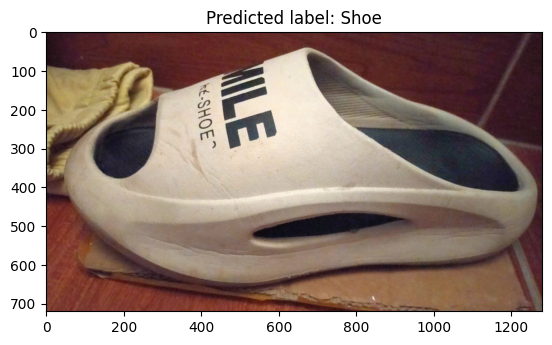

In [ ]:
# prompt: upload kiểm tra ảnh bất kỳ và hiển thị kết quả

from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
  img_path = fn
  img = cv2.imread(img_path)
  if img is not None:
    img_resized = cv2.resize(img, (256, 256))
    X_new_hog = extract_hog_features([img_resized])
    X_new_sift = extract_sift_features([img_resized])
    X_new_combined = np.hstack((X_new_hog, X_new_sift))
    X_new_combined = sc.transform(X_new_combined)
    y_pred_new = best_svm.predict(X_new_combined)
    predicted_label = label_encoder.inverse_transform([y_pred_new[0]])[0]

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted label: {predicted_label}")
  else:
    print("Không thể tải ảnh.")


In [ ]:
# prompt: Tạo các mô hình SVM với các score trên

# Lấy ra các tham số và score đạt được từ grid search
results = grid_search.cv_results_
models = []
for mean_score, params in zip(results['mean_test_score'], results['params']):
  if 0.8 <= mean_score <= 0.99:
    # Tạo mô hình SVM với các tham số tương ứng
    svm_model = SVC(**params)
    svm_model.fit(X_train, y_train)

    # Đánh giá mô hình
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Lưu mô hình và thông tin
    models.append({
        'model': svm_model,
        'params': params,
        'mean_score': mean_score,
        'accuracy': accuracy
    })


# In ra thông tin của các mô hình được tạo
for model_info in models:
  print("-" * 20)
  print("Parameters:", model_info['params'])
  print("Mean score (CV):", model_info['mean_score'])
  print("Accuracy on test set:", model_info['accuracy'])



In [ ]:
# prompt: Tạo các mô hình SVM với Bagging

# Tạo các mô hình SVM với Bagging
bagging_models = []
for model_info in models:
    svm_model = model_info['model']
    params = model_info['params']

    # Tạo mô hình Bagging với SVM làm estimator
    bagging_classifier = BaggingClassifier(estimator=svm_model, n_estimators=10, random_state=42)
    bagging_classifier.fit(X_train, y_train)

    # Đánh giá mô hình Bagging
    y_pred_bagging = bagging_classifier.predict(X_test)
    accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

    bagging_models.append({
        'model': bagging_classifier,
        'params': params,
        'accuracy': accuracy_bagging
    })

# In ra thông tin của các mô hình Bagging được tạo
for bagging_model_info in bagging_models:
    print("-" * 20)
    print("Parameters:", bagging_model_info['params'])
    print("Accuracy on test set (Bagging):", bagging_model_info['accuracy'])


--------------------
Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy on test set (Bagging): 0.9473684210526315
--------------------
Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
Accuracy on test set (Bagging): 0.9473684210526315
--------------------
Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Accuracy on test set (Bagging): 0.9473684210526315
--------------------
Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Accuracy on test set (Bagging): 0.868421052631579
--------------------
Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Accuracy on test set (Bagging): 0.9473684210526315
--------------------
Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Accuracy on test set (Bagging): 0.868421052631579
--------------------
Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy on test set (Bagging): 0.9473684210526315
--------------------
Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy on test set 

Saving 229414c3966930376978.jpg to 229414c3966930376978.jpg
Predicted label: Shoe


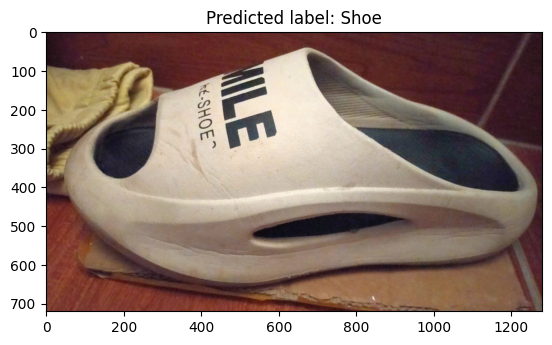

In [ ]:
# prompt: upload kiểm tra ảnh bất kỳ và hiển thị kết quả

from google.colab import files
import matplotlib.pyplot as plt

# Hàm dự đoán nhãn cho ảnh mới
def predict_image(img_path, model, sc, label_encoder):
    img = cv2.imread(img_path)
    if img is not None:
        img_resized = cv2.resize(img, (256, 256))
        X_hog_new = extract_hog_features([img_resized])
        X_sift_new = extract_sift_features([img_resized])
        X_combined_new = np.hstack((X_hog_new, X_sift_new))
        X_combined_new = sc.transform(X_combined_new)
        y_pred_new = model.predict(X_combined_new)
        predicted_label = label_encoder.inverse_transform([y_pred_new[0]])[0]
        return predicted_label
    else:
        return None


# Upload ảnh mới
uploaded = files.upload()

for fn in uploaded.keys():
  img_path = fn

  # Chọn mô hình tốt nhất (ví dụ: mô hình Bagging có độ chính xác cao nhất)
  best_bagging_model = max(bagging_models, key=lambda x: x['accuracy'])['model']

  # Dự đoán nhãn cho ảnh mới
  predicted_label = predict_image(img_path, best_bagging_model, sc, label_encoder)

  if predicted_label:
    print("Predicted label:", predicted_label)

    # Hiển thị ảnh
    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted label: {predicted_label}")
    plt.show()

  else:
      print("Không thể đọc được ảnh.")


In [ ]:

# 10. Tạo mô hình SVM với Bagging
bagging_linear = BaggingClassifier(estimator=svm, n_estimators=10, random_state=42)


In [ ]:
# 11. Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [ ]:
# 12. Huấn luyện mô hình
bagging_linear.fit(X_train, y_train)


BaggingClassifier(estimator=SVC(C=0.1, kernel='linear'), random_state=42)

In [ ]:

# 13. Dự đoán kết quả
y_pred = bagging_linear.predict(X_test)


In [ ]:

# 14. Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình với Bagging:", accuracy)


Độ chính xác của mô hình với Bagging: 0.9487179487179487


Saving 229414c3966930376978.jpg to 229414c3966930376978.jpg
User uploaded file "229414c3966930376978.jpg" with length 130659 bytes


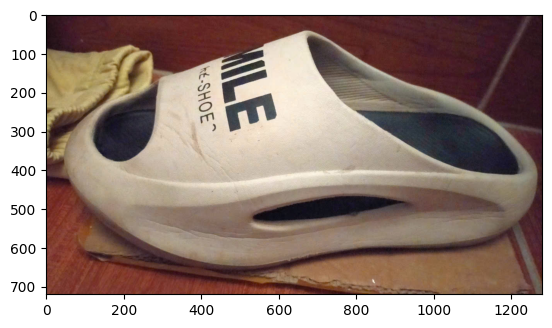

Kết quả dự đoán: 0
Đây là Boot


In [ ]:
# prompt: upload kiểm tra ảnh bất kỳ và hiển thị kết quả, 0 là boot, 1 là sandal, 2 là shoe

from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  img = cv2.imread(fn)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

  img_resized = cv2.resize(img, (256, 256))
  X_hog_new = extract_hog_features([img_resized])
  X_sift_new = extract_sift_features([img_resized])

  X_combined_new = np.hstack((X_hog_new, X_sift_new))
  X_combined_new = sc.transform(X_combined_new)

  y_pred_new = bagging_linear.predict(X_combined_new)

  print("Kết quả dự đoán:", y_pred_new[0])

  if y_pred_new[0] == 0:
      print("Đây là Boot")
  elif y_pred_new[0] == 1:
      print("Đây là Sandal")
  else:
      print("Đây là Shoe")



In [ ]:
# prompt: chuyển categories sang số

from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Chuyển đổi danh sách categories sang dạng số
encoded_categories = label_encoder.fit_transform(categories)

# In ra danh sách categories đã được chuyển đổi
print("Danh sách categories đã được chuyển đổi sang số:", encoded_categories)


Danh sách categories đã được chuyển đổi sang số: [0 1 2]


In [ ]:
import pandas as pd
import numpy as np
import cv2
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

# 1. Đọc dữ liệu
X_train = pd.read_csv('/content/DatasetShoe_nomain/trains_data.csv')
x_test = pd.read_csv('/content/DatasetShoe_nomain/tests_data.csv')
y_train = pd.read_csv('/content/DatasetShoe_nomain/trains_labels.csv')
y_test = pd.read_csv('/content/DatasetShoe_nomain/tests_labels.csv')

X_train = np.array(X_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# 2. Xử lý giá trị thiếu
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
x_test = imputer.transform(x_test)

# 3. Chuẩn hóa dữ liệu
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.transform(x_test)

# 4. Giảm chiều dữ liệu bằng PCA
pca = PCA(n_components=0.90)  # Giữ lại 90% phương sai
X_train = pca.fit_transform(X_train)
x_test = pca.transform(x_test)

# 5. Tạo hai mô hình SVM với linear và poly kernel
svm_linear = SVC(C=1, kernel='linear', gamma='auto')
svm_poly = SVC(C=1, kernel='poly', gamma='auto')

# 6. Kết hợp các mô hình sử dụng Bagging
bagging_linear = BaggingClassifier(estimator=svm_linear, n_estimators=10, random_state=42)
bagging_poly = BaggingClassifier(estimator=svm_poly, n_estimators=10, random_state=42)

# 7. Encode labels to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# 8. Huấn luyện các mô hình Bagging
bagging_linear.fit(X_train, y_train)
bagging_poly.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


BaggingClassifier(estimator=SVC(C=1, gamma='auto', kernel='poly'),
                  random_state=42)

In [ ]:

# 9. Upload 10 ảnh
uploaded = files.upload()

# Initialize counts
countb = 0
counts = 0
countd = 0

# Label mapping
label_mapping = {0: 'Boot', 1: 'Sandal', 2: 'Shoe'}
data = []
# Duyệt qua các ảnh đã upload
for fn in uploaded.keys():
    img_path = fn

    # Đọc ảnh và tiền xử lý
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (256, 256))  # Resize ảnh về 256x256
    img = img.flatten()
    data.append(img)
    df = pd.DataFrame(data)
    print(df)

Saving Shoe (5).jpg to Shoe (5) (2).jpg
   0      1      2      3      4      5      6      7      8      9      ...  \
0    255    255    255    255    255    255    255    255    255    255  ...   

   65526  65527  65528  65529  65530  65531  65532  65533  65534  65535  
0    255    255    255    255    255    255    255    255    255    255  

[1 rows x 65536 columns]


In [ ]:
import zipfile
dataset = zipfile.ZipFile('/content/Shoe vs Sandal vs Boot Dataset.zip', 'r')
dataset.extractall()
dataset.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder
import cv2
from skimage.feature import hog

In [ ]:
# 1. Đọc dữ liệu
X_train = pd.read_csv('/content/DatasetShoe_nomain/trains_data.csv')
x_test = pd.read_csv('/content/DatasetShoe_nomain/tests_data.csv')
y_train = pd.read_csv('/content/DatasetShoe_nomain/trains_labels.csv')
y_test = pd.read_csv('/content/DatasetShoe_nomain/tests_labels.csv')


In [ ]:

# 2. Hàm trích xuất đặc trưng HOG
def extract_hog_features(images):
    hog_features = []
    for img in images:
        img_reshaped = img.reshape((256, 256))  # Giả sử ảnh đã được resize về 256x256
        features, _ = hog(img_reshaped, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)
        hog_features.append(features)
    return np.array(hog_features)


In [ ]:

# 3. Hàm trích xuất đặc trưng SIFT
def extract_sift_features(images):
    sift = cv2.SIFT_create()
    sift_features = []
    for img in images:
        img_reshaped = img.reshape((256, 256)).astype('uint8')  # Chuyển ảnh về uint8 nếu cần
        keypoints, descriptors = sift.detectAndCompute(img_reshaped, None)
        if descriptors is not None:
            sift_features.append(np.mean(descriptors, axis=0))  # Lấy trung bình các descriptor
        else:
            sift_features.append(np.zeros(128))  # Nếu không có đặc trưng nào, tạo vector rỗng
    return np.array(sift_features)


In [ ]:

# 4. Trích xuất đặc trưng HOG và SIFT
X_train_hog = extract_hog_features(np.array(X_train))
x_test_hog = extract_hog_features(np.array(x_test))

X_train_sift = extract_sift_features(np.array(X_train))
x_test_sift = extract_sift_features(np.array(x_test))


In [ ]:
# 5. Kết hợp HOG và SIFT thành một tập đặc trưng
X_train_combined = np.hstack((X_train_hog, X_train_sift))
x_test_combined = np.hstack((x_test_hog, x_test_sift))


In [ ]:

# 6. Chuẩn hóa dữ liệu
sc = StandardScaler()
X_train_combined = sc.fit_transform(X_train_combined)
x_test_combined = sc.transform(x_test_combined)


In [ ]:
# prompt: tìm tham số tốt nhất cho mô hình svm, chỉ hiển thị trên 0.8 và nhỏ 0.99

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto'],
              'kernel': ['rbf', 'poly', 'linear']}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_combined, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Print scores for all combinations that are above 0.8 and below 0.99
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    if 0.8 < mean_score < 0.99:
        print("Score:", mean_score, "Parameters:", params)
        svm_model = SVC(C=params['C'], kernel=params['kernel'], gamma=params['gamma'])
        print(svm_model)

Best parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Best score: 0.9099999999999999
Score: 0.9099999999999999 Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
SVC(C=0.1, gamma=0.001, kernel='linear')
Score: 0.9099999999999999 Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
SVC(C=0.1, gamma=0.01, kernel='linear')
Score: 0.9099999999999999 Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
SVC(C=0.1, gamma=0.1, kernel='linear')
Score: 0.9099999999999999 Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear')
Score: 0.9099999999999999 Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVC(C=0.1, kernel='linear')
Score: 0.9099999999999999 Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
SVC(C=0.1, gamma='auto', kernel='linear')
Score: 0.9099999999999999 Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
SVC(C=1, gamma=0.001, kernel='linear')
Score: 0.9099999999999999 Parameters: {'C': 1, 'ga

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

# 7. Tạo hai mô hình SVM với linear và poly kernel
svm_kaurb = SVC(C=1, gamma='auto', kernel= 'rbf')
svm_haurb = SVC(C=10, gamma='auto', kernel= 'rbf')
svm_baurb = SVC(C=100, gamma='auto', kernel= 'rbf')

# svm_linear = SVC(C=1, kernel='linear', gamma='auto')
# svm_poly = SVC(C=1, kernel='poly', gamma='auto')


In [ ]:
# prompt: Kết hợp các mô hình sử dụng Bagging

# 6. Kết hợp các mô hình sử dụng Bagging
bagging_kaurb = BaggingClassifier(estimator=svm_kaurb, n_estimators=10, random_state=42)
bagging_haurb = BaggingClassifier(estimator=svm_haurb, n_estimators=10, random_state=42)
bagging_baurb = BaggingClassifier(estimator=svm_baurb, n_estimators=10, random_state=42)

In [ ]:
# 9. Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [ ]:
print(y_train)

[1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0]


In [ ]:
# prompt: Huấn luyện mô hình

bagging_kaurb.fit(X_train_combined, y_train)
bagging_haurb.fit(X_train_combined, y_train)
bagging_baurb.fit(X_train_combined, y_train)


BaggingClassifier(estimator=SVC(C=100, gamma='auto'), random_state=42)

In [ ]:
# prompt:  Dự đoán kết quả

# Predict the labels for the uploaded images
y_pred_kaurb = bagging_kaurb.predict(x_test_combined)
y_pred_haurb = bagging_haurb.predict(x_test_combined)
y_pred_baurb = bagging_baurb.predict(x_test_combined)


In [ ]:
# 12. Kết hợp dự đoán của hai mô hình
y_pred_combined = np.array([y_pred_kaurb, y_pred_haurb, y_pred_baurb]).mean(axis=0).round().astype(int)


In [ ]:
# Kết hợp dự đoán của các mô hình bằng cách lấy mode (giá trị xuất hiện nhiều nhất)
from scipy.stats import mode

y_pred_all = [y_pred_kaurb, y_pred_haurb, y_pred_baurb]

# Calculate the mode for each prediction
y_pred_combined = mode(y_pred_all, axis=0)[0][0]

# Ensure y_pred_combined is an array
y_pred_combined = np.array([y_pred_combined] * len(y_test))

# In ra dự đoán kết hợp
print("Dự đoán kết hợp:", y_pred_combined)

# Tính độ chính xác của dự đoán kết hợp
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_combined)
print("Độ chính xác:", accuracy)

Dự đoán kết hợp: [2 2 2 2 2 2]
Độ chính xác: 0.3333333333333333


In [ ]:
# prompt: Tính độ chính xác các mô hình svm

# Tính độ chính xác của từng mô hình SVM

accuracy_kaurb = accuracy_score(y_test, y_pred_kaurb)
accuracy_haurb = accuracy_score(y_test, y_pred_haurb)
accuracy_baurb = accuracy_score(y_test, y_pred_baurb)
accuracy_combined = accuracy_score(y_test, y_pred_combined)

# In ra độ chính xác của từng mô hình
print("Độ chính xác bagging_kaurb:", accuracy_kaurb)
print("Độ chính xác bagging_haurb:", accuracy_haurb)
print("Độ chính xác bagging_baurb:", accuracy_baurb)
print("Độ chính xác mô hình kết hợp:", accuracy_combined)

Độ chính xác bagging_kaurb: 0.8333333333333334
Độ chính xác bagging_haurb: 0.8333333333333334
Độ chính xác bagging_baurb: 0.8333333333333334
Độ chính xác mô hình kết hợp: 0.3333333333333333


In [ ]:
# prompt: upload kiểm tra ảnh bất kỳ và hiển thị kết quả
from google.colab import files
# 9. Upload 10 ảnh
uploaded = files.upload()

# Initialize counts
countb = 0
counts = 0
countd = 0

# Label mapping
label_mapping = {0: 'Boot', 1: 'Sandal', 2: 'Shoe'}


# Duyệt qua các ảnh đã upload
for fn in uploaded.keys():
    img_path = fn

    # Đọc ảnh và tiền xử lý
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (256, 256))  # Resize ảnh về 256x256
    img = img.flatten()

    # Trích xuất đặc trưng HOG và SIFT cho ảnh mới
    img_hog = extract_hog_features(np.array([img]))
    img_sift = extract_sift_features(np.array([img]))
    img_combined = np.hstack((img_hog, img_sift))

    # Chuẩn hóa dữ liệu
    img_combined = sc.transform(img_combined)

    # Dự đoán kết quả
    y_pred_linear_img = bagging_linear.predict(img_combined)
    y_pred_poly_img = bagging_poly.predict(img_combined)
    y_pred_combined_img = np.array([y_pred_linear_img, y_pred_poly_img]).mean(axis=0).round().astype(int)

    # Hiển thị kết quả
    predicted_label = label_mapping[y_pred_combined_img[0]]
    print(f"Ảnh '{fn}' được dự đoán là: {predicted_label}")

    # Hiển thị ảnh
    plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


In [ ]:

# 1. Đọc dữ liệu
X_train = pd.read_csv('/content/DatasetShoe_nomain/trains_data.csv')
x_test = pd.read_csv('/content/DatasetShoe_nomain/tests_data.csv')
y_train = pd.read_csv('/content/DatasetShoe_nomain/trains_labels.csv')
y_test = pd.read_csv('/content/DatasetShoe_nomain/tests_labels.csv')


In [ ]:
print(X_train)

      0    1    2    3    4    5    6    7    8    9  ...  65526  65527  \
0   255  255  255  255  255  255  255  255  255  255  ...    255    255   
1   255  255  255  255  255  255  255  255  255  255  ...    255    255   
2   255  255  255  255  255  255  255  255  255  255  ...    255    255   
3   255  255  255  255  255  255  255  255  255  255  ...    255    255   
4   255  255  255  255  255  255  255  255  255  255  ...    255    255   
5   255  255  255  255  255  255  255  255  255  255  ...    255    255   
6   255  255  255  255  255  255  255  255  255  255  ...    255    255   
7   255  255  255  255  255  255  255  255  255  255  ...    255    255   
8   255  255  255  255  255  255  255  255  255  255  ...    255    255   
9   255  255  255  255  255  255  255  255  255  255  ...    255    255   
10  255  255  255  255  255  255  255  255  255  255  ...    255    255   
11  255  255  255  255  255  255  255  255  255  255  ...    255    255   
12  255  255  255  255  2

In [ ]:

X_train = np.array(X_train)
x_test = np.array(x_test)
y_train = np.array(y_train) # Chuyển thành 1D array để phù hợp với sklearn
y_test = np.array(y_test)


In [ ]:
# 3. Chuẩn hóa dữ liệu
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.transform(x_test)


In [ ]:
print(X_train)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [ ]:

# 5. Tạo hai mô hình SVM với linear và poly kernel
svm_linear = SVC(C=1, kernel='linear', gamma='auto')
svm_poly = SVC(C=1, kernel='poly', gamma='auto')


In [ ]:

# 6. Kết hợp các mô hình sử dụng Bagging
bagging_linear = BaggingClassifier(estimator=svm_linear, n_estimators=10, random_state=42) # Changed 'base_estimator' to 'estimator'
bagging_poly = BaggingClassifier(estimator=svm_poly, n_estimators=10, random_state=42) # Changed 'base_estimator' to 'estimator'


In [ ]:

# 7. Encode labels to numerical values
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
# 8. Huấn luyện các mô hình Bagging
bagging_linear.fit(X_train, y_train)
bagging_poly.fit(X_train, y_train)


BaggingClassifier(estimator=SVC(C=1, gamma='auto', kernel='poly'),
                  random_state=42)

In [ ]:
# 9. Dự đoán kết quả trên tập kiểm thử cho cả hai mô hình
y_pred_linear = bagging_linear.predict(x_test)
y_pred_poly = bagging_poly.predict(x_test)


In [ ]:

# 10. Kết hợp dự đoán của hai mô hình bằng cách lấy trung bình dự đoán
y_pred_combined = np.array([y_pred_linear, y_pred_poly]).mean(axis=0).round().astype(int)


In [ ]:

# 11. Tính độ chính xác cho từng mô hình và mô hình kết hợp
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_combined = accuracy_score(y_test, y_pred_combined)


In [ ]:

# 12. In kết quả
print("\nĐộ chính xác mô hình Linear Kernel với Bagging:", accuracy_linear)
print("Độ chính xác mô hình Poly Kernel với Bagging:", accuracy_poly)
print("Độ chính xác mô hình kết hợp Linear và Poly Kernel:", accuracy_combined)


Độ chính xác mô hình Linear Kernel với Bagging: 0.8333333333333334
Độ chính xác mô hình Poly Kernel với Bagging: 0.8333333333333334
Độ chính xác mô hình kết hợp Linear và Poly Kernel: 0.8333333333333334


In [ ]:
# prompt: uploaded 10 ảnh

from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Upload 10 ảnh
uploaded = files.upload()
countb = 0
counts = 0
countd = 0
# Duyệt qua các ảnh đã upload
for fn in uploaded.keys():
  img_path = fn

  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (256, 256))
  img = img.flatten()
  data.append(img)
  df = pd.DataFrame(data)
  img = np.array(df)
  img = imputer.transform(img)
  img = sc.transform(img)
  img = pca.transform(img)

  # Predict using the combined model
  prediction_linear = bagging_linear.predict(img)[0]
  prediction_poly = bagging_poly.predict(img)[0]

  # Combine predictions (if needed, you can adjust this based on how you combined them during training)
  combined_prediction = np.array([prediction_linear, prediction_poly]).mean().round().astype(int) # Removed [0] as combined_prediction is already an integer

  # Dự đoán
  # y_pred_img = svm_model.predict(img)
  if combined_prediction == 0: # Changed string labels to numerical labels
    countb += 1
  elif combined_prediction == 2:
    counts += 1
  elif combined_prediction == 1:
    countd += 1

  # Hiển thị kết quả
  # Convert numerical prediction back to string label
  label_mapping = {0: 'Boot', 1: 'Sandal', 2: 'Shoe'}
  predicted_label = label_mapping[combined_prediction]
  print("Kết quả dự đoán cho ảnh", fn + ":", predicted_label)

print("Số lượng Boot:", countb)
print("Số lượng Sandal:", countd)
print("Số lượng Shoe:", counts)

Saving n3786tr72b6.jpg to n3786tr72b6 (2).jpg
Kết quả dự đoán cho ảnh n3786tr72b6 (2).jpg: Shoe
Số lượng Boot: 0
Số lượng Sandal: 0
Số lượng Shoe: 1


In [ ]:
# prompt: giải nén file zip

import zipfile

# Đường dẫn đến file zip
zip_file_path = '/content/DatasetShoe_nomain.zip'

# Giải nén file zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall('')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder

# 1. Đọc dữ liệu
X_train = pd.read_csv('/content/DatasetShoe_nomain/trains_data.csv')
x_test = pd.read_csv('/content/DatasetShoe_nomain/tests_data.csv')
y_train = pd.read_csv('/content/DatasetShoe_nomain/trains_labels.csv')
y_test = pd.read_csv('/content/DatasetShoe_nomain/tests_labels.csv')

X_train = np.array(X_train)
x_test = np.array(x_test)
y_train = np.array(y_train) # Chuyển thành 1D array để phù hợp với sklearn
y_test = np.array(y_test)

# 2. Xử lý giá trị thiếu
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
x_test = imputer.transform(x_test)

# 3. Chuẩn hóa dữ liệu
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.transform(x_test)

# 4. Giảm chiều dữ liệu bằng PCA
pca = PCA(n_components=0.90)  # Giữ lại 90% phương sai
X_train = pca.fit_transform(X_train)
x_test = pca.transform(x_test)

# 5. Tạo hai mô hình SVM với linear và poly kernel
svm_linear = SVC(C=1, kernel='linear', gamma='auto')
svm_poly = SVC(C=1, kernel='poly', gamma='auto')

# 6. Kết hợp các mô hình sử dụng Bagging
bagging_linear = BaggingClassifier(estimator=svm_linear, n_estimators=10, random_state=42) # Changed 'base_estimator' to 'estimator'
bagging_poly = BaggingClassifier(estimator=svm_poly, n_estimators=10, random_state=42) # Changed 'base_estimator' to 'estimator'

# 7. Encode labels to numerical values
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# 8. Huấn luyện các mô hình Bagging
bagging_linear.fit(X_train, y_train)
bagging_poly.fit(X_train, y_train)

# 9. Dự đoán kết quả trên tập kiểm thử cho cả hai mô hình
y_pred_linear = bagging_linear.predict(x_test)
y_pred_poly = bagging_poly.predict(x_test)

# 10. Kết hợp dự đoán của hai mô hình bằng cách lấy trung bình dự đoán
y_pred_combined = np.array([y_pred_linear, y_pred_poly]).mean(axis=0).round().astype(int)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
# prompt: lưu kết quả huấn luyện Kết hợp dự đoán của hai mô hình  thành sav

import joblib

# Lưu mô hình kết hợp dự đoán
joblib.dump(y_pred_combined, 'combined_prediction_model.sav')
print("Lưu mô hình kết hợp dự đoán thành công!")


Lưu mô hình kết hợp dự đoán thành công!


In [ ]:
# prompt: kiểm tra ảnh bất kỳ với dữ liệu lưu trên

import joblib
import cv2
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import files


# Load the saved combined prediction model
loaded_model = joblib.load('combined_prediction_model.sav')

# Upload an image
uploaded = files.upload()

# Load the necessary components for preprocessing
imputer = SimpleImputer(strategy='mean')
sc = StandardScaler()
pca = PCA(n_components=0.90)

# Loop through uploaded images
for fn in uploaded.keys():
    img_path = fn
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (256, 256))
    img = img.flatten()
    data = [img]
    df = pd.DataFrame(data)
    img = np.array(df)

    # Preprocess the image using the same steps as during training
    img = imputer.transform(img)
    img = sc.transform(img)
    img = pca.transform(img)

    # Predict using the loaded model
    # prediction = loaded_model.predict(img)[0]  # Assuming the model has a predict method
    # print(prediction)

    # Convert numerical prediction back to string label
    label_mapping = {0: 'Boot', 1: 'Sandal', 2: 'Shoe'}
    predicted_label = label_mapping[loaded_model[0]] # Assuming loaded_model is an array with one prediction
    print("Kết quả dự đoán cho ảnh", fn + ":", predicted_label)


In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
from skimage.feature import hog
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib
import pickle

# SVM Training
def train_svm(X_train_svm, y_train_svm):
    scaler_svm = StandardScaler()
    X_train_svm = scaler_svm.fit_transform(X_train_svm)

    pca = PCA(n_components=0.90)  # Giảm chiều bằng PCA
    X_train_svm = pca.fit_transform(X_train_svm)

    svm_linear = SVC(C=1, kernel='linear', gamma='auto')
    bagging_linear = BaggingClassifier(estimator=svm_linear, n_estimators=10, random_state=42)
    bagging_linear.fit(X_train_svm, y_train_svm)

    # Lưu scaler, PCA, và mô hình SVM đã huấn luyện
    joblib.dump(scaler_svm, 'scaler_svm.pkl')
    joblib.dump(pca, 'pca_svm.pkl')
    joblib.dump(bagging_linear, 'svm_model.pkl')

    print("Đã lưu mô hình SVM và các thành phần thành công!")

# CART Training (Image-based)
def preprocess_image(image_path, size=(256, 256)):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, size)
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    return img_gray

def extract_hog_features(img):
    features, _ = hog(img, pixels_per_cell=(16, 16), cells_per_block=(4, 4), visualize=True)
    return features

def extract_sift_features(img):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    if descriptors is None:
        return np.zeros((1, 128))
    return descriptors.flatten()[:128]

def extract_combined_features(img):
    hog_features = extract_hog_features(img)
    sift_features = extract_sift_features(img)
    return np.concatenate([hog_features, sift_features])

def train_cart(image_paths, labels):
    features_list = []
    for image_path in image_paths:
        img = preprocess_image(image_path)
        features = extract_combined_features(img)
        features_list.append(features)

    X_cart = np.array(features_list)
    scaler_cart = StandardScaler()
    X_cart = scaler_cart.fit_transform(X_cart)

    le_cart = LabelEncoder()
    y_cart = le_cart.fit_transform(labels)

    X_train_cart, X_test_cart, y_train_cart, y_test_cart = train_test_split(X_cart, y_cart, test_size=0.2, random_state=42)

    cart_model = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2, min_samples_split=5)
    cart_model.fit(X_train_cart, y_train_cart)

    # Lưu scaler và mô hình CART đã huấn luyện
    joblib.dump(scaler_cart, 'scaler_cart.pkl')
    joblib.dump(cart_model, 'cart_model.pkl')

    print("Đã lưu mô hình CART và scaler thành công!")

# Main training function
if __name__ == "__main__":
    # SVM data
    X_train_svm = pd.read_csv('/content/DatasetShoe_nomain/trains_data.csv').values
    y_train_svm = pd.read_csv('/content/DatasetShoe_nomain/trains_labels.csv').values.ravel()

    train_svm(X_train_svm, y_train_svm)

    # CART data
    dataset_path = '/content/Shoe vs Sandal vs Boot Dataset'
    image_paths, labels = [], []

    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_paths.append(os.path.join(class_path, image_name))
                labels.append(class_name)

    train_cart(image_paths, labels)


Đã lưu mô hình SVM và các thành phần thành công!
Đã lưu mô hình CART và scaler thành công!


In [20]:
# prompt: tải /content/train_model.zip ở đây lên kaggle

!kaggle datasets init -p /content/
!kaggle datasets create -p /content/


Data package template written to: /content/dataset-metadata.json
Default slug detected, please change values before uploading


In [ ]:
# prompt: tải /content/train_model.zip ở đây lên

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!unzip /content/train_model.zip
